In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from fbprophet import Prophet

In [4]:
data= pd.read_csv("C:/Users/Himanshu vyas/OneDrive/Desktop/covid 19/covid_19_data.csv")

In [5]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [7]:
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [14]:
data2 = data.groupby(["Date", "Country", "Province/State"]).sum().reset_index()

In [15]:
data2.head()

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/01/2021,Australia,Australian Capital Territory,192681,118.0,3.0,114.0
1,01/01/2021,Australia,New South Wales,192986,4947.0,54.0,0.0
2,01/01/2021,Australia,Northern Territory,193003,75.0,0.0,71.0
3,01/01/2021,Australia,Queensland,193058,1255.0,6.0,1224.0
4,01/01/2021,Australia,South Australia,193119,580.0,4.0,566.0


In [16]:
cont=data.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [17]:
cont.head()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,17026442.0,669075.0,13464399.0
3,Albania,19768869.0,375955.0,13945256.0
4,Algeria,27684358.0,834464.0,18959299.0


In [27]:
date_wise=data.groupby('Date').sum()
date_wise.Confirmed.max()

169951560.0

hence, total Number of cases= 169951560

In [28]:
y=date_wise.iloc[:,2].values
x=date_wise.iloc[:,[1,3]].values
x[:,1]*=-1
a=np.array([[1],[2]])
i=0
for i in range(3,495,1):
    a=np.append(a,[[i]],axis=0)

x=np.append(x,a,axis=1)

In [29]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
recovered = data.groupby('Date').sum()['Recovered'].reset_index()

In [30]:
confirmed.head()

,Date,Confirmed
0,01/01/2021,84092619.0
1,01/02/2021,84718978.0
2,01/03/2021,85251774.0
3,01/04/2021,85805892.0
4,01/05/2021,86546014.0


In [32]:
deaths.head()

,Date,Deaths
0,01/01/2021,1834675.0
1,01/02/2021,1843108.0
2,01/03/2021,1850449.0
3,01/04/2021,1860598.0
4,01/05/2021,1875953.0


In [34]:
deaths.Deaths.max()

3533619.0

total number of deaths=3533619

In [35]:
recovered.head()

,Date,Recovered
0,01/01/2021,47313005.0
1,01/02/2021,47614297.0
2,01/03/2021,47882779.0
3,01/04/2021,48173187.0
4,01/05/2021,48488548.0


In [36]:
recovered.Recovered.max()

107140669.0

Total Number of people recovered=107140669

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


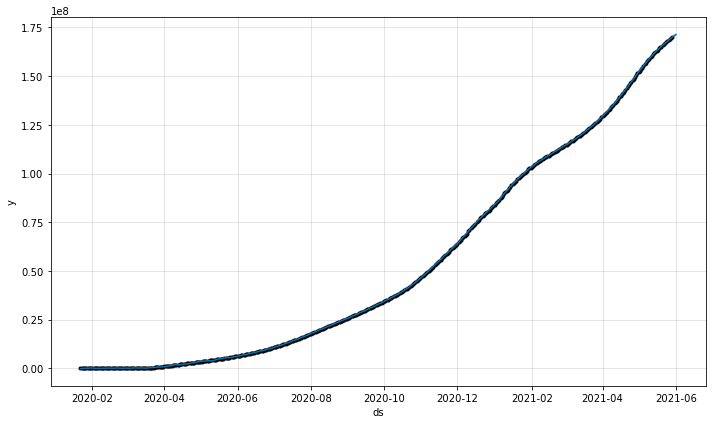

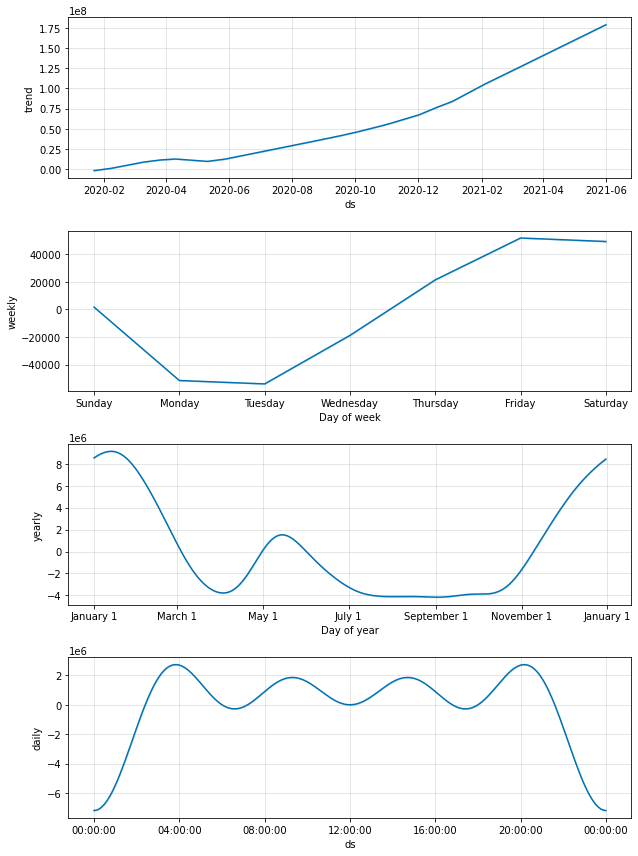

In [37]:
#CONFIRMED

confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(confirmed)
future = m.make_future_dataframe(periods=3)
future_confirmed = future.copy() 
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
confirmed_forecast_plot = m.plot(forecast)
forecast_components = m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


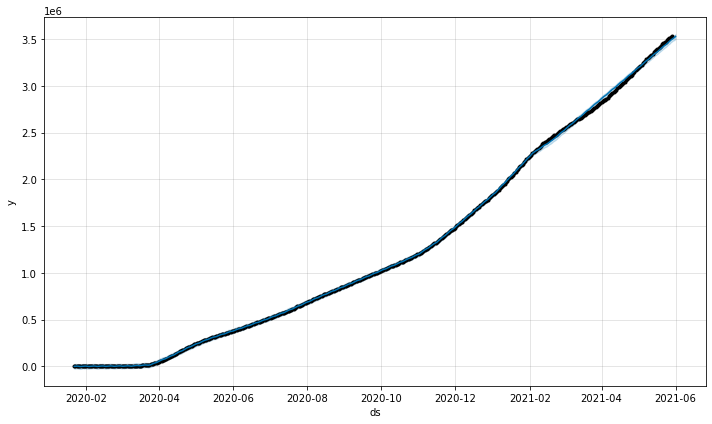

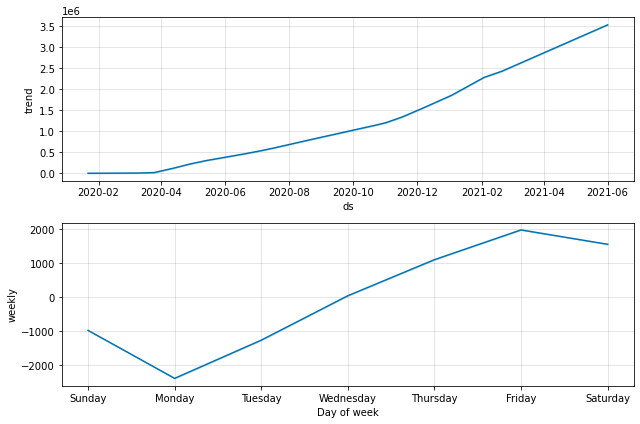

In [38]:
#DEATHS

deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m2 = Prophet(interval_width=0.95)
m2.fit(deaths)
future2 = m.make_future_dataframe(periods=3)
future_deaths = future.copy() 
future2.tail()
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
death_forecast_plot = m2.plot(forecast2)
forecast2_components = m2.plot_components(forecast2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


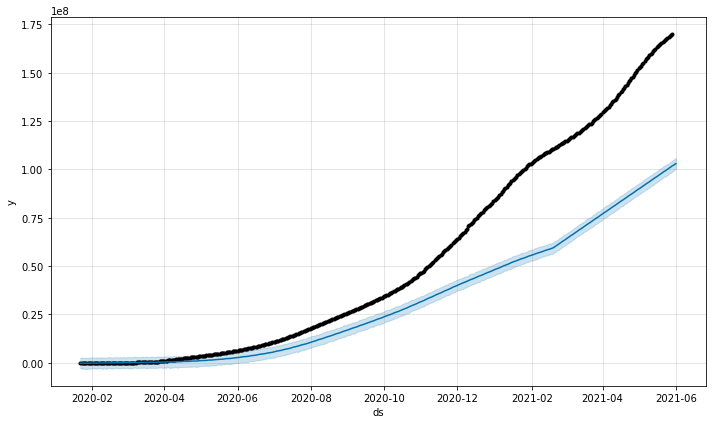

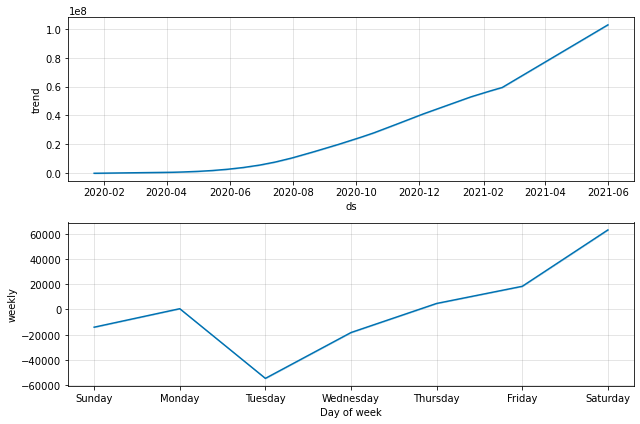

In [39]:
#RECOVERED

recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
m3 = Prophet(interval_width=0.95)
m3.fit(recovered)
future3 = m3.make_future_dataframe(periods=3)
future3_recovered = future3.copy()
future3.tail()
forecast3 = m3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
recovered_forecast_plot = m.plot(forecast3)
forecast3_components = m3.plot_components(forecast3)